# Project 2 - Polynomial Models for Boston House Prices

## Group members
   Michael Peralta (mikeperalta@csu.fullerton.edu)
   
   Brandon Xue (brandonx@csu.fullerton.edu)

### CPSC 483-02, Section ID: 33018

# Experiment 1
Load and examine the Boston dataset’s features, target values, and description.

In [293]:
# Reset the environment variables without confirmation.
# This avoids broken code from functioning off of artifacts
# left behind from previous executions.
%reset -f

# 1. Load and examine
import pandas as pd
import numpy as np
from sklearn.datasets import *

bs = load_boston()
bs.DESCR # description
bs.data # features
bs.target # targets
print("Features: ", end="")
print(*bs.feature_names, sep=", ")

Features: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT


# Experiment 2
Use *sklearn.model_selection.train_test_split()* to split the features and values into separate training and test sets. Use 80% of the original data as a training set, and 20% for testing.


In [294]:
# 2. Partition into training and testing sets
from IPython.display import display

from sklearn import model_selection

feature_frame = pd.DataFrame(data=bs.data, columns=bs.feature_names)

# Add targets to same data frame so they stay paired with other data during the partition
feature_frame.insert(len(feature_frame.columns), 'TARGET', bs.target)

# train_test_split returns a list of the train-test split of inputs
train_features, test_features = model_selection.train_test_split(feature_frame,
                                               train_size=0.8,
                                               random_state=113) # reproducible outputs

# Now that the set is partitioned, grab the targets into a separate data frame
train_target = pd.DataFrame(data=train_features.iloc[:, -1:])
test_target = pd.DataFrame(data=test_features.iloc[:, -1:])

# And then remove the targets from the feature matrix
train_features = train_features.drop(columns='TARGET')
test_features = test_features.drop(columns='TARGET')

# Using IPython.display allows us to view multiple data frames in the same execution
# and use the pretty IPython format instead of the plain text of print()
print("Training set:")
display(train_features)
display(train_target)

print("Test set:")
display(test_features)
display(test_target)

Training set:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4.0,304.0,18.4,396.23,12.73
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84
410,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90
475,6.39312,0.0,18.10,0.0,0.584,6.162,97.4,2.2060,24.0,666.0,20.2,302.76,24.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29
74,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71


,TARGET
319,21.0
41,26.6
410,15.0
250,24.4
475,13.3
...,...
364,21.9
74,24.1
162,50.0
220,26.7


Test set:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
22,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
202,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
368,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
335,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
461,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.05188,0.0,4.49,0.0,0.4490,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86
193,0.02187,60.0,2.93,0.0,0.4010,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
282,0.06129,20.0,3.33,1.0,0.4429,7.645,49.7,5.2119,5.0,216.0,14.9,377.07,3.01


,TARGET
22,15.2
202,42.3
368,50.0
335,21.1
461,17.7
...,...
86,22.5
193,31.1
5,28.7
282,46.0


# Experiment 3
Create a *scatterplot* of the training set showing the relationship between the feature LSTAT and the target value MEDV.

***Question***: Does the relationship appear to be linear?

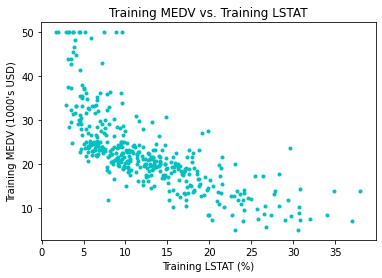

In [295]:
# 3. Scatter plot of training data
import matplotlib.pyplot as plt

fig_1, ax_1 = plt.subplots() # Obtain a tuple of a figure with one subplot

ax_1.plot(train_features['LSTAT'], train_target, 'c.') # Cyan dots look nice

# Use ax.set to set axis labels and a title
retval = ax_1.set(xlabel="Training LSTAT (%)", ylabel="Training MEDV (1000's USD)",
                 title="Training MEDV vs. Training LSTAT")
# Capture the return value in variable retval so it is not printed by the notebook

## Does the relationship appear to be linear?

The above relationship between the feature LSTAT and the target value MEDV does not quite appear to be linear. If we only examined LSTAT ranges from 10 to 25, it might, but the overall data appears to show a non-linear relationship.

# Experiment 4
With LSTAT as ***X*** and MEDV as ***t***, use *np.linalg.inv()* to compute ***w*** for the training set.

***Question***: What is the equation for MEDV as a linear function of LSTAT?

We will use the following formula to compute the weights:

$$
w = (X^TX)^{-1}X^Tt
$$

(found in the linear_regression_vectors_and_matrices.ipynb notebook)

The equation for MEDV as a linear function of LSTAT is written after the code below.

In [296]:
# 4. A linear model for MEDV as a function of LSTAT

# Copying Mike's idea, it makes sense to define a function to create the X matrix

# The input feature should be a Pandas DataFrame or a Series
# In either case, the features must be properly named
def make_poly_X(features, *, max_degree: int = 1, has_ones: bool = False):
    # If max_degree < 1, return immediately
    if max_degree < 1:
        return None
    
    # Handle Pandas Series objects by creating a frame out of them
    if isinstance(features, pd.Series):
        features = pd.DataFrame(data=features, columns=[features.name])
    
    # If not a DataFrame at this point, there is an error
    if not isinstance(features, pd.DataFrame):
        return None
    
    features = pd.DataFrame(features[features.columns]) # Make a copy to not affect original data
        
    # Insert column of ones on the left if not already exists
    if not has_ones:
        features.insert(0, # insert at leftmost column
                       'YINT_CONST', # name of column represents y-intercept constant
                       np.ones_like(features.iloc[:,0]))
        

    # Grab all column names, ignoring the column of ones. This should have names of all features
    feature_columns = features.columns.values[1:]
    
    # Iterate over each feature
    for feature_name in feature_columns:
        feature_index = features.columns.get_loc(feature_name)
        
        # For each feature, insert its higher degree columns sequentially
        for exponent in range(2, max_degree+1):
            features.insert(feature_index + exponent - 1, # column index to insert at
                            feature_name + "^" + str(exponent), # column name
                            features[feature_name].pow(exponent)) # Series multiplied
            
    # Return updated features
    return features

# Using our function, create our X matrix for a linear model
lstat_vals = train_features['LSTAT']
lstat_lin = make_poly_X(lstat_vals, max_degree=1, has_ones=False)
display(lstat_lin)

,YINT_CONST,LSTAT
319,1.0,12.73
41,1.0,4.84
410,1.0,10.11
250,1.0,5.90
475,1.0,24.10
...,...,...
364,1.0,5.29
74,1.0,6.78
162,1.0,1.92
220,1.0,9.71


In [297]:
# Intended use: Use make_poly_X to get X_matrix as a DataFrame
# 
def calc_weights(X_matrix: pd.DataFrame, targets: pd.DataFrame, method="inv", verbose=False):
    """
    Intended use:
        Use make_poly_X to get X_matrix as a DataFrame.
        Provide targets as a single column DataFrame.
    """
    
    XT_X = np.dot(X_matrix.T, X_matrix) # X.transpose() dot X
    XT_t = np.dot(X_matrix.T, targets) # X.transpose() dot target vector
    
    if verbose:
        print("XT_X:", XT_X, sep="\n", end="\n\n")
        print("XT_t:", XT_t, sep="\n", end="\n\n")
        
    # Using inverse, according to fcml Chapter 1 appendix, this is not ideal
    # It can become slow and inaccurate
    if method == "inv":
        XT_X_inv = np.linalg.inv(XT_X)
        if verbose:
            print("XT_X_inv:", XT_X_inv, sep="\n", end="\n\n")
        weights = np.dot(XT_X_inv, XT_t)
    
    # Using linalg.solve, according to fcml Chapter 1 appexndix, is preferable
    elif method == "solve":
        weights = np.linalg.solve(XT_X, XT_t)

    # Create a list to rename the rows into w0, w1, ...
    indices = ["w" + str(i) for i in range(len(X_matrix.columns))]
    
    weights = pd.DataFrame(weights, # put weights into a data frame
                           columns=['WEIGHTS'], # rename the column
                           index=indices)  # rename the rows
        
    if verbose:
        display(weights)
    
    return pd.DataFrame(weights)
   
    
    
lstat_lin_weights = calc_weights(lstat_lin, train_target, method="inv", verbose=True)

XT_X:
[[  404.      5047.87  ]
 [ 5047.87   82555.3463]]

XT_t:
[[ 9152.4  ]
 [96065.778]]

XT_X_inv:
[[ 1.04880552e-02 -6.41295104e-04]
 [-6.41295104e-04  5.13252564e-05]]



,WEIGHTS
w0,34.384364
w1,-0.938789


## Equation for MEDV as a linear function of LSTAT
Using our training set, the equation for MEDV as a linear function of LSTAT is:

\begin{align}
MEDV = 34.38436369 - (0.93878862 * LSTAT)
\end{align}

# Experiment 5

Use **w** to add a line to your scatter plot from experiment *(3)*.

***Question***: How well does the model appear to fit the training set?


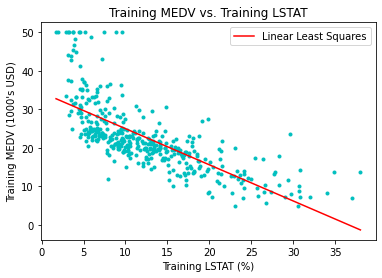

In [298]:
# 5. Plotting and evaluating the linear MEDV v LSTAT model

# Helper function for creating points for best fit line
def make_x_y(X_column: pd.Series, weights: pd.DataFrame, degree=1):
    """
    Intended Use:
        Provide X_column as a Pandas Series.
        Use the [] operator on a data frame to get a Series.
        Use calc_weights to get weights as a DataFrame
    """
    # Generate uniform values across the range of [min(X_column), max(X_column)]
    x_uniform = np.linspace(X_column.min(), X_column.max(), X_column.count())

    # Put the new x values in a data frame
    x_uniform = pd.DataFrame(data=x_uniform, columns=[X_column.name])

    # Make the Xmatrix.
    X_matrix = make_poly_X(x_uniform, max_degree=degree, has_ones=False)
    y_predictions = np.dot(X_matrix, weights)
    return (x_uniform, y_predictions)



lstat_linear_x, lstat_linear_y = make_x_y(lstat_vals, lstat_lin_weights, degree=1)

fig_2, ax_2 = plt.subplots()
# Scatter actual training data
ax_2.plot(train_features['LSTAT'], train_target, 'c.')
# Create line of best fit using points that are uniformly spaced in the x-axis
ax_2.plot(lstat_linear_x, lstat_linear_y, 'r-', label="Linear Least Squares")
ax_2.legend()
retval = ax_2.set(xlabel="Training LSTAT (%)", ylabel="Training MEDV (1000's USD)",
                 title="Training MEDV vs. Training LSTAT")

# How well does the model appear to fit the training set?
5. The linear model of MEDV as a function of LSTAT does not appear to be a good fit for the data.

# Experiment 6
Use **w** to find the response for each value of the LSTAT attribute in the test set, then compute the test *MSE L* for the model.

In [299]:
# 6. Computing MSE for the linear MEDV v LSTAT model on the test set

# Create helper function to calculate MSE

# Intended use:
# use make_poly_X to get a Data Frame for X_matrix_df
# use 
def calc_MSE(X_matrix: pd.DataFrame, weights: pd.DataFrame, targets: pd.DataFrame, verbose=False):
    """
    Intended Use:
        Use make_poly_X to get X_matrix as a DataFrame
        Use calc_weights to get weights as a DataFrame
        Provide targets as a DataFrame
    """
    # This becomes a numpy ndarray
    predictions = np.dot(X_matrix, weights) # X * w = y(hat)
    
    # This becomes a DataFrame again
    residuals = targets - predictions # Residuals vector (observed - predicted)
    residuals.columns = ['RESID']
    
    if verbose:
        display(residuals)
    
    # This becomes a numpy ndarray once more, with shape (1, 1)
    sum_squared_error = np.dot(residuals.T, residuals) # dotting residuals with self
    # We need to grab the scalar value inside
    sum_squared_error = sum_squared_error[0][0]
    
    # Now divide sum sq. err. with the number of values to get the mean sq. err. (MSE)
    num_elems = len(predictions)
    MSE = sum_squared_error / num_elems
    return MSE
    

# Grab the LSTAT values for the test set
lstat_test_vals = test_features['LSTAT']

# Create the X matrix for the test LSTAT
lstat_test_lin = make_poly_X(lstat_test_vals, max_degree=1, has_ones=False)

lstat_lin_MSE = calc_MSE(lstat_test_lin, lstat_lin_weights, test_target)

print("Testing MSE for LSTAT linear model:", lstat_lin_MSE)

# Graphing the result of prediction on test set (optional)
# lstat_lin_test_x, lstat_lin_test_y = make_x_y(lstat_test_vals, lstat_lin_weights, degree=1)
# fig_3, ax_3 = plt.subplots()
# # Scatter actual testing data
# ax_3.plot(lstat_test_vals, test_target, 'c.')
# # Create line of best fit using points that are uniformly spaced in the x-axis
# ax_3.plot(lstat_lin_test_x, lstat_lin_test_y, 'r-', label="Prediction using weights from training")
# ax_3.legend()
# retval = ax_3.set(xlabel="Test LSTAT (%)", ylabel="Test MEDV (1000's USD)",
#                  title="Testing MEDV vs. Testing LSTAT")

Testing MSE for LSTAT linear model: 39.95751318608688


##  MSE For Linear Model

6. The testing MSE for the LSTAT linear model was 39.95751318608688. The predictions are made using the weights derived from the training set, and are compared with the actual test data targets. The linear model still appears to be a poor predictor for MEDV.

# Experiment 7
Now add an *x 2* column to LSTAT’s *x* column in the training set, then repeat experiments *(4)* , *(5)*, and *(6)* for MEDV as a quadratic function of LSTAT.

***Question***: Does the quadratic polynomial do a better job of predicting the values in the test set?

## Performing Experiment 4 on the New Quadratic Matrix
With LSTAT as ***X*** and MEDV as ***t***, use *np.linalg.inv()* to compute ***w*** for the training set.

***Question***: What is the equation for MEDV as a ***QUADRATIC*** function of LSTAT?

In [300]:
# 7 (4). Quadratic LSTAT model

lstat_quad = make_poly_X(lstat_vals, max_degree=2, has_ones=False)
display(lstat_quad)

lstat_quad_weights = calc_weights(lstat_quad, train_target, method="inv")
display(lstat_quad_weights)

,YINT_CONST,LSTAT,LSTAT^2
319,1.0,12.73,162.0529
41,1.0,4.84,23.4256
410,1.0,10.11,102.2121
250,1.0,5.90,34.8100
475,1.0,24.10,580.8100
...,...,...,...
364,1.0,5.29,27.9841
74,1.0,6.78,45.9684
162,1.0,1.92,3.6864
220,1.0,9.71,94.2841


,WEIGHTS
w0,41.861883
w1,-2.163404
w2,0.038287


### What is the equation for MEDV as a ***QUADRATIC*** function of LSTAT?

The equation for MEDV using the quadratic model is:

\begin{aligned}
\text{MEDV} = 41.8618826 - 2.163404190 * \text{LSTAT} + 0.0382868299 * \text{LSTAT}^2
\end{aligned}

## Performing Experiment 5 on the new Quadratic Matrix
Use ***w*** to add a line to your scatter plot from experiment *(3)*.

***Question***: How well does the model appear to fit the training set?

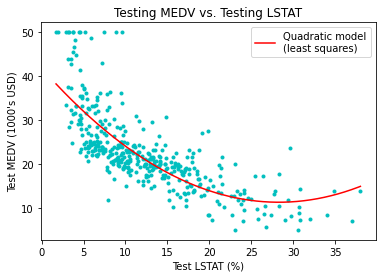

In [301]:
# 7 (5) Adding best fit line to scatter

# Use our function to create points for the best-fit curve
lstat_quad_x, lstat_quad_y = make_x_y(lstat_vals, lstat_quad_weights, degree=2)

# Plot best fit quad model on training data
fig_4, ax_4 = plt.subplots()
# Plot the actual training data
ax_4.plot(lstat_vals, train_target, 'c.')
# Draw the quadratic best fit curve
ax_4.plot(lstat_quad_x, lstat_quad_y, 'r-', label="Quadratic model\n(least squares)")
ax_4.legend()
retval = ax_4.set(xlabel="Test LSTAT (%)", ylabel="Test MEDV (1000's USD)",
                 title="Testing MEDV vs. Testing LSTAT")

### How well does the model appear to fit the training set?
7. (5) Visually, the model appears to fit the training data a lot better than the linear model.

## Performing Experiment 6 on the New Quadratic Matrix
Use ***w*** to find the response for each value of the LSTAT attribute in the test set, then
compute the test *MSE L* for the model.

In [302]:
# 7 (6) Computing MSE of the quadratic model

# Recall that the LSTAT values for the test set are in l_stat_test_vals

# Create the quad X matrix for the test LSTAT
lstat_test_quad = make_poly_X(lstat_test_vals, max_degree=2, has_ones=False)

lstat_quad_MSE = calc_MSE(lstat_test_quad, lstat_quad_weights, test_target, verbose=True)
print("Testing MSE for LSTAT quadratic model:", lstat_quad_MSE)

,RESID
22,0.419868
202,6.795990
368,14.783918
335,-5.889502
461,-0.685226
...,...
86,2.127635
193,-0.848651
5,-2.929808
282,10.303081


Testing MSE for LSTAT quadratic model: 23.6381157322272


## Does the quadratic polynomial do a better job of predicting the values in the test set?

7. (6) The test MSE for the LSTAT quadratic model is lower than that of the linear model.

Q: Does the quadratic polynomial do a better job of predicting the values in the test set?

A: Yes, the quadratic polynomial has a lower testing MSE; therefore it predicts the values of the test set better.

# Experiment 8
Repeat experiment *(4)* with all 13 input features as ***X*** and using *np.linalg.lstsq()*. (See the Appendix to *Linear regression in vector and matrix format* for details of why we need to switch away from *np.linalg.inv()*, and the notes for *np.linalg.solve()* for why we shouldn’t use that either.)

***Question***: Does adding additional features improve the performance on the test set compared to using only LSTAT?

In [303]:
# 8. All 13 features, linear model

# Recall that the training features data frame is: train_features

# Create X matrix for 13 features
all_feat_lin = make_poly_X(train_features, max_degree=1, has_ones=False)

# (XT X) w = (XT t)
# Here, (XT X) is a square matrix, and (XT t) is a vector of dependent variables
# Aw = b
# np.linalg.solve(A, b) gives w

# in the function defined earlier, we can simply pass "solve"
# into the method parameter to do this

afl_weights = calc_weights(all_feat_lin, train_target, method="solve", verbose=False)
display(afl_weights.T)

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13
WEIGHTS,33.548626,-0.114331,0.03304,0.021991,1.930478,-15.345988,4.116789,-0.005205,-1.261116,0.352665,-0.013738,-1.015215,0.009987,-0.49095


8. The equation for MEDV using all 13 features is:

\begin{aligned}
\text{MEDV}\ =\ & 33.5486261 \\
& - 0.114331280(\text{CRIM}) +  0.0330399664(\text{ZN}) + 0.0219911151(\text{INDUS}) \\
& + 1.93047806(\text{CHAS}) - 15.3459876(\text{NOX}) +  4.11678898(\text{RM}) \\
& - 0.00520475977(\text{AGE}) - 1.26111638(\text{DIS}) + 0.352665352(\text{RAD}) \\
& - 0.0137375084(\text{TAX}) - 1.01521476(\text{PTRATIO}) + 0.00998692962(\text{B}) \\
& -0.490950094(\text{LSTAT})
\end{aligned}

In [304]:
# Make predictions on test sest

# Create X matrix with test features
all_feat_lin_test = make_poly_X(test_features[test_features.columns.values], max_degree=1, has_ones=False)

afl_MSE = calc_MSE(all_feat_lin_test, afl_weights, test_target, verbose=False)
print("Testing MSE for 13 feature linear model:", afl_MSE)
print("Recall the testing MSE for LSTAT linear model:", lstat_lin_MSE)

Testing MSE for 13 feature linear model: 24.73245890338015
Recall the testing MSE for LSTAT linear model: 39.95751318608688


## Improvement with Additional Features?
*Does adding additional features improve the performance on the test set compared to using only LSTAT?*

8. Comparing the linear models, accuracy seems to improve with 13 features, as opposed to just LSTAT.

# Experiment 9
Now add ***x^2*** columns for all 13 features, and repeat experiment *(8)*.

***Question***: Does adding quadratic features improve the performance on the test set compared to using only linear features?

In [305]:
# 9. Quadratic model with all features

# Recall that the training features data frame is: train_features

# Create X matrix
all_feat_quad = make_poly_X(train_features[train_features.columns.values], max_degree=2, has_ones=False)
# Note that the CHAS (Charles River flag variable) is still the same after squaring,
# because its values are either 0 or 1. This would make the matrix no longer linearly
# independent, which has two problems:
# 1. The dependent column adds no expressive value to our model. It is redundant.
# 2. The dependence means there are infinite solutions and np.linalg.solve() won't work. 
# 
# Manually remove the CHAS^2 column to fix this.
all_feat_quad = all_feat_quad.drop(columns='CHAS^2')

afq_weights = calc_weights(all_feat_quad, train_target, method="solve")
display(afq_weights.T)

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w16,w17,w18,w19,w20,w21,w22,w23,w24,w25
WEIGHTS,146.957942,-0.322141,0.002081,-0.051523,0.0005,-0.181702,0.008714,2.144079,-11.450271,-8.110194,...,0.654423,-0.009507,-0.029416,0.000017,-5.205129,0.123266,0.035631,-0.000063,-1.119274,0.018454


In [306]:
# To compare performance, compute the test MSE for the all features quadratic model
afq_test = make_poly_X(test_features[test_features.columns.values], max_degree=2, has_ones=False)

# Once again make sure to drop CHAS^2
afq_test = afq_test.drop(columns='CHAS^2')

afq_MSE = calc_MSE(afq_test, afq_weights, test_target)
print("Testing MSE for 13 feature quadratic model:", afq_MSE)
print("Recall the testing MSE for 13 feature linear model:", afl_MSE)

Testing MSE for 13 feature quadratic model: 14.24993723370723
Recall the testing MSE for 13 feature linear model: 24.73245890338015


## Improved Performance With Quadratic Features?
Q: Does adding quadratic features improve the performance on the test set compared to using only linear features?
A: Yes. It appears that the testing MSE has dropped significantly using the quadratic model.

# Experiment 10
Compute the training MSE for experiments *(8)* and *(9)* and compare it to the test MSE.

***Question***: What explains the difference?

In [307]:
# 10. Computing training MSE for both linear and quadratic 13-feature models.

##### Training MSE for 13 feature linear
# Recall that the X matrix for the 13 feature linear model is: all_feat_lin
# Recall that the weight vector for the 13 feature linear model is: afl_weights
afl_train_MSE = calc_MSE(all_feat_lin, afl_weights, train_target)


##### Training MSE for 13 feature quadratic
# Recall that the X matrix for the 13 feature quadratic model is: all_feat_quad
# Recall that the weight vector for the 13 feature quadratic model is: afq_weights
afq_train_MSE = calc_MSE(all_feat_quad, afq_weights, train_target)

print("Training MSE for 13 feature linear:", afl_train_MSE)
print("Testing MSE for 13 feature linear:", afl_MSE, end="\n\n")

print("Training MSE for 13 feature quadratic:", afq_train_MSE)
print("Testing MSE for 13 feature quadratic:", afq_MSE)

Training MSE for 13 feature linear: 21.403639758899573
Testing MSE for 13 feature linear: 24.73245890338015

Training MSE for 13 feature quadratic: 14.703196138766748
Testing MSE for 13 feature quadratic: 14.24993723370723


## What explains the difference?: Answer
10. The testing MSE went up during the use of our 13-feature linear model. The linear model is the simplest model we can have, so we cannot be overfitting. Thus, it appears our linear model is an underfit. Our quadratic model produced a much better training MSE, and the improvement persisted during our testing phase. This suggests that the true behavior is more closely modeled by the quadratic model.

# Experiment 11
Repeat experiments *(9)* and *(10)*, adding *x^3* columns in addition to the existing *x* and *x^2* columns for each feature. Does the cubic polynomial do a better job of predicting the values in the training set?

***Question***: Does it do a better job of predicting the values in the test set?

In [308]:
# 11. Going to cubic

# afc = all features cubic
afc_train_X = make_poly_X(train_features[train_features.columns.values], max_degree=3, has_ones=False)
afc_test_X = make_poly_X(test_features[test_features.columns.values], max_degree=3, has_ones=False)

# As with the quadratic model, we have to remove higher order of the CHAS column
# to avoid linear dependence.
afc_train_X = afc_train_X.drop(columns=['CHAS^2', 'CHAS^3'])
afc_test_X = afc_test_X.drop(columns=['CHAS^2', 'CHAS^3'])

display(afc_train_X) # Take a look at this big frame

# Calculate weights using training set
afc_weights = calc_weights(afc_train_X, train_target, method="solve")

# Calculate MSE for training and test sets
afc_train_MSE = calc_MSE(afc_train_X, afc_weights, train_target)
afc_test_MSE = calc_MSE(afc_test_X, afc_weights, test_target)

print("Training MSE for 13 feature cubic model:", afc_train_MSE)
print("Testing MSE for 13 feature cubic model:", afc_test_MSE)

,YINT_CONST,CRIM,CRIM^2,CRIM^3,ZN,ZN^2,ZN^3,INDUS,INDUS^2,INDUS^3,...,TAX^3,PTRATIO,PTRATIO^2,PTRATIO^3,B,B^2,B^3,LSTAT,LSTAT^2,LSTAT^3
319,1.0,0.47547,0.226072,0.107490,0.0,0.0,0.0,9.90,98.0100,970.299000,...,28094464.0,18.4,338.56,6229.504,396.23,156998.2129,6.220740e+07,12.73,162.0529,2062.933417
41,1.0,0.12744,0.016241,0.002070,0.0,0.0,0.0,6.91,47.7481,329.939371,...,12649337.0,17.9,320.41,5735.339,385.41,148540.8681,5.724914e+07,4.84,23.4256,113.379904
410,1.0,51.13580,2614.870042,133713.471475,0.0,0.0,0.0,18.10,327.6100,5929.741000,...,295408296.0,20.2,408.04,8242.408,2.60,6.7600,1.757600e+01,10.11,102.2121,1033.364331
250,1.0,0.14030,0.019684,0.002762,22.0,484.0,10648.0,5.86,34.3396,201.230056,...,35937000.0,19.1,364.81,6967.871,396.28,157037.8384,6.223095e+07,5.90,34.8100,205.379000
475,1.0,6.39312,40.871983,261.299494,0.0,0.0,0.0,18.10,327.6100,5929.741000,...,295408296.0,20.2,408.04,8242.408,302.76,91663.6176,2.775208e+07,24.10,580.8100,13997.521000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,1.0,3.47428,12.070622,41.936719,0.0,0.0,0.0,18.10,327.6100,5929.741000,...,295408296.0,20.2,408.04,8242.408,354.55,125705.7025,4.456896e+07,5.29,27.9841,148.035889
74,1.0,0.07896,0.006235,0.000492,0.0,0.0,0.0,12.83,164.6089,2111.932187,...,63044792.0,18.7,349.69,6539.203,394.92,155961.8064,6.159244e+07,6.78,45.9684,311.665752
162,1.0,1.83377,3.362712,6.166441,0.0,0.0,0.0,19.58,383.3764,7506.509912,...,65450827.0,14.7,216.09,3176.523,389.61,151795.9521,5.914122e+07,1.92,3.6864,7.077888
220,1.0,0.35809,0.128228,0.045917,0.0,0.0,0.0,6.20,38.4400,238.328000,...,28934443.0,17.4,302.76,5268.024,391.70,153428.8900,6.009810e+07,9.71,94.2841,915.498611


Training MSE for 13 feature cubic model: 13.57312036962322
Testing MSE for 13 feature cubic model: 13.111505077532069


# Improved Performance With Cubic Features?
*Does adding **CUBIC** features improve the performance on the test set compared to using only **LINEAR OR QUADRATIC** features?* Does the cubic polynomial do a better job of predicting the values in the training set? Does it do a better job of predicting the values in the test set? Compute the MSE for experiments 8 and 9 and compare it to the test MSE. What explains the difference?*

11. The cubic polynomial (13 feature model) predicts the training set better than its quadratic and linear counterparts. It also predicts the test set better than the quadratic and linear models. The training MSE for the cubic model was lower than the testing MSE. We can infer from this data that the cubic model is a better fit, and more closely models the true relationship between MEDV and the other 13 features.